In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [2]:
Data=pd.read_csv("C:\\Users\\Sai Rathan\\Desktop\\Data.csv")
Data['class'].replace(['STAR','GALAXY','QSO'],[0,1,2],inplace=True)
Data=Data.drop(columns=['objid','rerun','field','camcol','fiberid'])#less correlated
Data_X=Data.drop(columns=['class'])
mean=Data_X.mean()
var=Data_X.max()-Data_X.min()
Data_train=Data.sample(frac=0.8,random_state=200)
Data_test=Data.drop(Data_train.index)
Ytrain=np.array(Data_train['class']).reshape(Data_train.shape[0],1)
Ytrain=np.array(pd.DataFrame(Ytrain==[0,1,2]).replace([True,False],[1.0,0.0]))
Xtrain=np.array((Data_train.drop(columns=['class'])-mean)/var)
Ytest=np.array(Data_test['class']).reshape(Data_test.shape[0],1)
Ytest=np.array(pd.DataFrame(Ytest==[0,1,2]).replace([True,False],[1.0,0.0]))
Xtest=np.array((Data_test.drop(columns=['class'])-mean)/var)

In [3]:
L=5
nL=[Xtrain.shape[1],5,5,5,3]
W=[]
b=[]
A=[tf.placeholder(tf.float64,shape=Xtrain.shape,name='X')]
Atest=[tf.placeholder(tf.float64,shape=Xtest.shape,name='Xtest')]
Z=[0]
Ztest=[0]
Y=tf.placeholder(tf.float64,shape=Ytrain.shape,name='Y')
YTest=tf.placeholder(tf.float64,shape=Ytest.shape,name='Ytest')
for i in range(1,L):
    W.append(tf.Variable(np.random.randn(nL[i-1],nL[i])*np.sqrt(2/nL[i-1]),dtype=tf.float64))
    b.append(tf.Variable(np.random.randn(1,nL[i])*np.sqrt(2/nL[i-1]),dtype=tf.float64))
    Z.append(tf.matmul(A[-1],W[-1])+b[-1])
    Ztest.append(tf.matmul(Atest[-1],W[-1])+b[-1])
    A.append(tf.tanh(Z[-1]) if i<L-1 else tf.nn.softmax(Z[-1]))
    Atest.append(tf.tanh(Ztest[-1]) if i<L-1 else tf.nn.softmax(Ztest[-1]))
cost=-1*tf.reduce_mean(Y*tf.log(A[-1]))
cost2=-1*tf.reduce_mean(YTest*tf.log(Atest[-1]))
train=tf.train.AdamOptimizer(0.001).minimize(cost)

In [4]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [5]:
J=[]
for i in range(10000):
    sess.run(train,feed_dict={A[0]:Xtrain,Y:Ytrain})
    J.append(sess.run(cost,feed_dict={A[0]:Xtrain,Y:Ytrain}))
    if i%500==0:
        print(i,J[-1])


0 0.4768211059681651
500 0.12191879001564039
1000 0.0717768872057577
1500 0.045349485496278895
2000 0.03661961068068489
2500 0.03217325240249558
3000 0.028751936235100355
3500 0.026141895263693073
4000 0.02327807457070728
4500 0.018787996904777497
5000 0.014724809747515073
5500 0.013156247331523933
6000 0.01212831138770574
6500 0.011384946326038217
7000 0.010856532781218559
7500 0.01048413150021547
8000 0.010228315674817055
8500 0.010048138280212077
9000 0.009893527579427311
9500 0.009739192954448635


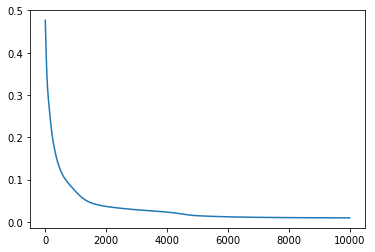

In [6]:
plt.plot(np.array(J))
plt.show()

In [7]:
predTrain=np.round(sess.run(A[-1],feed_dict={A[0]:Xtrain}),decimals=0)
predTest=np.round(sess.run(Atest[-1],feed_dict={Atest[0]:Xtest}),decimals=0)

In [8]:
print("Training:\n",accuracy_score(Ytrain,predTrain))
print(classification_report(Ytrain,predTrain))

Training:
 0.9935
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      3334
          1       0.99      0.99      0.99      3980
          2       0.99      0.97      0.98       686

avg / total       0.99      0.99      0.99      8000



In [9]:
print("Test:\n",accuracy_score(Ytest,predTest))
print(classification_report(Ytest,predTest))

Test:
 0.991
             precision    recall  f1-score   support

          0       0.99      1.00      0.99       818
          1       1.00      0.99      0.99      1018
          2       0.97      0.97      0.97       164

avg / total       0.99      0.99      0.99      2000

